In [74]:
import numpy as np
from matplotlib import pyplot as plt

plt.rc('font', family='monospace', size=14, serif='courier')
plt.rc('mathtext', fontset='stix')


from scipy.stats import norm

import seaborn as sns
import pandas as pd

## 1 QDA
(a)

In [84]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: group the points into two arrays pts0, pts1 according to the labels
pts0 = pts[labels==0]
pts1 = pts[labels==1]

pts_df = pd.DataFrame.from_dict(data={'class_0':pts0,'class_1':pts1},orient='index')
pts_df = pts_df.T

# TODO: compute the mean and standard deviations for each class (and print them)
mu_0,std_0 = norm.fit(pts0)
mu_1,std_1 = norm.fit(pts1)

print(f'pts1: \n mu:{mu_0:.6f}, std:{std_0:.6f}')
print(f'pts2: \n mu:{mu_1:.6f}, std:{std_1:.6f}')

pts1: 
 mu:-0.708592, std:1.649707
pts2: 
 mu:0.542157, std:1.278007


(b)

In [120]:
# fig,ax = plt.subplots(2,1,figsize=(12,10))
# fig.tight_layout()

# ax[0].hist(pts0,label='Class: 0',bins=20,density=True,alpha=0.5)
# ax[0].hist(pts1,label='Class: 1',bins=20,density=True,alpha=0.5)

# ax[0].plot(x,lkd_0,label='P(X|Y=0)',linestyle='--')
# ax[0].plot(x,lkd_1,label='P(X|Y=1)',linestyle='-.')

# ax[0].plot(x,post_1,label='P(Y=1|X)')

# ax[0].set_xlabel('x')
# ax[0].set_ylabel('Counts')
# ax[0].set_title('Combined Plot',pad=15)
# ax[0].legend()
# ax[0].grid()

# ax[1].plot(x,lkd_0,label='P(X|Y=0)',linestyle='--')
# ax[1].plot(x,lkd_1,label='P(X|Y=1)',linestyle='-.')
# ax[1].fill_between(-std_0, lkd_0, 0, facecolor='yellow', alpha=0.5)
# ax[1].fill_between(std_0, lkd_0, 0, facecolor='yellow', alpha=0.5)

# ax[1].plot(x,post_1,label='P(Y=1|X)')

# ax[1].set_xlabel('x')
# ax[1].set_ylabel('Counts')
# ax[1].set_title('Prob Plots',pad=15)
# ax[1].legend()
# ax[1].grid()

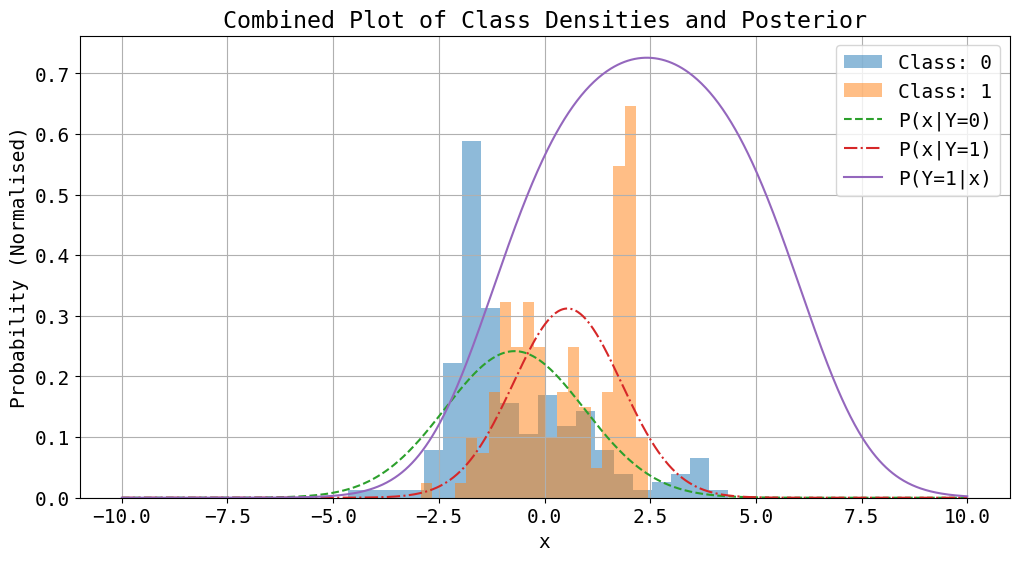

In [130]:
# TODO: evaluate the Gaussian class densities in a range from -10 to 10
x = np.linspace(-10,10,1000)
lkd_0 = norm.pdf(x,mu_0,std_0)
lkd_1 = norm.pdf(x,mu_1,std_1)

# TODO: evaulate the posterior p(y=1|x)
post_0 = lkd_0 / (lkd_0+lkd_1)
post_1 = lkd_1 / (lkd_0+lkd_1)


# TODO: plot the class densities and the posterior p(y=1|x). (Don't forget title, axis labels, legend)
plt.figure(figsize=(12,6))
plt.hist(pts0,label='Class: 0',bins=20,density=True,alpha=0.5)
plt.hist(pts1,label='Class: 1',bins=20,density=True,alpha=0.5)

plt.plot(x,lkd_0,label='P(x|Y=0)',linestyle='--')
plt.plot(x,lkd_1,label='P(x|Y=1)',linestyle='-.')

# plt.plot(x,lkd_0-lkd_1,label='Decision Boundary')
plt.plot(x,post_1,label='P(Y=1|x)')

plt.xlabel('x')
plt.ylabel('Probability (Normalised)')
plt.title('Combined Plot of Class Densities and Posterior')
plt.legend()
plt.grid()

## Plot Inference:
- We can observe that the likelihood of class 0, $P(x|Y=0)$, has more spread and less peak probability than the class 1, $P(x|Y=1)$. 
- Therefore, given the prior probabilities to be equal, $P(x|Y=0) = P(x|Y=1)$, the posterior is only dependent on the class likelihoods, $$P(Y=1|x) = \frac{P(x|Y=1)}{P(x|Y=0) + P(x|Y=1)}$$, hence the mean of posterior is on the positive $x$. 
- The Posterior signifies that the probability of a class $Y=1$ point to be classified in class $Y=1$ is higher than in class $Y=0$.

## 3 Trees and Random Forests
(a)

In [ ]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
    
# TODO: Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)


(b)

In [ ]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of hyperparameters as specified on the sheet
#       and evaluate the performances on the validation set.


In [ ]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set


## 4 Beta Distribution

In [ ]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# split the data into the classes
pts1 = pts[labels==0]
pts2 = pts[labels==1]

# plot the data
fig, ax = plt.subplots(figsize=(15, 1))
plt.scatter(pts1, np.ones_like(pts1), label='pts1', marker='|', alpha=0.3)
plt.scatter(pts2, np.zeros_like(pts2), label='pts2', marker='|', alpha=0.3)
plt.legend()
plt.yticks([])
plt.ylim(-0.2, 1.2)
plt.show()

In [ ]:
from scipy.special import gamma, gammaln

def beta_pdf(x, a, b):
    """Probability density function for the Beta distribution with parameters a and b. Works verctorized over all inputs"""
#     return (gamma(a+b) * x**(a-1) * (1-x)**(b-1)) / gamma(a) / gamma(b)  # breaks down for larger a, b
    return np.exp(gammaln(a+b) - gammaln(a) - gammaln(b) + np.log(x)*(a-1) + np.log(1-x)*(b-1))  # works for larger a, b

eps = 1e-6
x = np.linspace(eps, 1-eps, 1000, endpoint=True)
for a, b in ((0.1, 0.1), (0.1, 1), (1, 1), (2, 2), (10, 10), (5, 15)):
    plt.plot(x, beta_pdf(x, a, b), label=f'{a=}, {b=}')
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.title('Beta distribution for different parameters')
plt.show()

In [ ]:

def count_points_within_distance(x, pts, r):
    """
    Count number of points among pts within a distance r of query points x (in 1D).
    
    Parameters
    ----------
    x : np.ndarray
        Query points of shape (M).
    pts : np.ndarray
        Points to be searched, shape (N).
    r : float
        radius.
        
    Returns
    -------
    np.ndarray
        Array of counts of shape (M)
        
    """
    # TODO: sort the points
    
    # TODO: use np.searchsorted on the interval boundaries 
    #       to find number of points inside each interval (don't use loops!)
    
    return counts

# use a flat prior
prior_a, prior_b = 1, 1  

# define value range
vmin, vmax = -5, 5

# set the radius
r = .3

# TODO: sample x and mu as described in the exercise

# TODO: use count_points_within_distance to calculate the counts

# TODO (optional): plot the counts vs x

# TODO: evaluate the posterior to get an image (use broadcasting, no loops needed!)

# TODO: plot the posterior as an image, specify the correct origin and extent


(e) Bonus